# PROYECTO 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
from cmath import exp, log10, sqrt

## Ejercicio 1

In [3]:
"""
Cargamos la data en el identificador 'df' y erificamos la frecuencia de autos según el país
"""
df = pd.read_csv("autos.csv", sep=";")
df["Pais_Origen"].value_counts() 

USA       254
Japan      79
Europe     73
Name: Pais_Origen, dtype: int64

In [4]:
"""
Luego usamos la función lambda para recodificar y la aplicamos a la variable 'Pais_Origen' según la condición:
- 1: USA
- 2: Japan
- 3: Europe
"""

df['Pais_Origen'] = df['Pais_Origen'].apply(lambda x: 1 if x == 'USA' else (
                                                        2 if x == 'Japan' else 3))
df.head(10)


,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0
5,15.0,8,1,4341,429.0,10.0,ford galaxie 500,1/01/1970,198.0
6,14.0,8,1,4354,454.0,9.0,chevrolet impala,1/01/1970,220.0
7,14.0,8,1,4312,440.0,8.5,plymouth fury iii,1/01/1970,215.0
8,14.0,8,1,4425,455.0,10.0,pontiac catalina,1/01/1970,225.0
9,15.0,8,1,3850,390.0,8.5,amc ambassador dpl,1/01/1970,190.0


## Ejercicio 2

In [5]:
"""
LIMPIEZA DE DATOS

1. Verificamos la cantidad de datos faltantes y en que columnas están los datos perdidos
"""

df.isnull().sum().sort_values(ascending=False)

Millas_Por_Galon     8
Caballo_De_Fuerza    6
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
dtype: int64

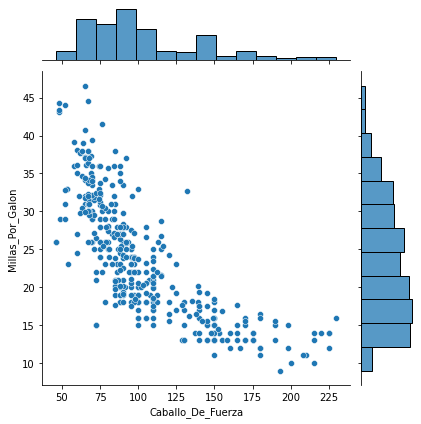

In [6]:
"""
2. Obteniendo la data solo de las filas que no contengan ningun nulo
- Gruadamos en un identificador el DataFrame 'df_temp' que no tenga valores nulos
- Graficamos para verificar la relación entra las columnas con valores nulos
"""

df_temp = df[(~df['Millas_Por_Galon'].isnull()) & (~df['Caballo_De_Fuerza'].isnull())]
sns.jointplot(y=df_temp['Millas_Por_Galon'], x=df_temp['Caballo_De_Fuerza'])


*NOTA*: Observamos que la relación es inversamente proporcional, lo que nos lleva a concluir que podemos rellenar los valores faltantes con información entre ambas variables

In [7]:
# Serie de la columna Caballo_De_Fuerza que tienen nulos en la columna Millas_Por_Galon
def fill_nan_values(df: pd.DataFrame, column1_nan: str, column2_support: str)-> None:
    '''
    Realiza lo siguiente:
    1- se alamacena en un identificador temporal (data_temp) los datos de la columna de apoyo (column2_support) 
    que no contegan nulos en la columna a tratar (column1_nan).  
    2- En un bucle for utilizamos cada valor de (data_temp) para seleccionar los datos de la columna a tratar
       que tengan ese valor en la columna de apoyo.  
    3- Extraemos la medía y la almacenamos en (median_value).  
    4- Llenamos los datos faltantes de la columna a tratar con la mediana de todos los datos de la columna de apoyo
       que tengan su valor equivalente.

    Parámetros
    ----------

    df: Dataframe con todos los datos
    column1_nan: columna a tratar (Con datos faltantes a rellenar)
    column2_support: columna de apoyo (sin datos faltantes)

    No retorna ningún valor

    Ejemplos
    --------

    fill_nan_values(df = dataFrame, 
                    column1_nan = 'Columna_1', 
                    column2_support ='Columna_2')


    '''
    data_temp = df.loc[df[column1_nan].isnull(), column2_support]

    for i in data_temp:
        # Promedio Millas_Por_Galon con un valor en la columna Caballo_De_Fuerza
        median_value = df.loc[df[column2_support] == i, column1_nan].mean()
        # Se asigna el promedio a los valores nulos de la columna Millas_Por_Galon
        df.loc[df[column1_nan].isnull() & (df[column2_support] == i),
               column1_nan] = median_value


In [8]:
# Hacemos uso de la función y llenamos los datos vacios

fill_nan_values(df = df, column1_nan = 'Millas_Por_Galon',column2_support='Caballo_De_Fuerza')
fill_nan_values(df = df, column1_nan = 'Caballo_De_Fuerza', column2_support = 'Millas_Por_Galon')

In [9]:
# Verificamos que aún no se han llenado todos los datos
df.isnull().sum().sort_values(ascending=False)

Caballo_De_Fuerza    2
Millas_Por_Galon     0
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
dtype: int64

In [10]:
# Verificamos los datos que faltan
df[df['Caballo_De_Fuerza'].isna()]

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
337,40.9,4,3,1835,85.0,17.3,renault lecar deluxe,1/01/1980,NaN
343,23.6,4,1,2905,140.0,14.3,ford mustang cobra,1/01/1980,NaN


In [11]:
# Verificamos los rangos apropiados en donde se encuentran los valores perdidos para verificar y estimar un valor apropiado para llenarlo
# Esto lo aplicamos para la columna Caballo_De_Fuerza 

# RANGO 1 [40 - 45] Millas por galon

df[(df['Millas_Por_Galon']>=40) & (df['Millas_Por_Galon']<=45)]

# RANGO 2 [23.5 - 23.9] Millas por galon

df[(df['Millas_Por_Galon']>=23.5) & (df['Millas_Por_Galon']<=23.9)]

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
279,23.8,4,1,2855,151.0,17.6,oldsmobile starfire sx,1/01/1978,85.0
280,23.9,4,2,2405,119.0,14.9,datsun 200-sx,1/01/1978,97.0
307,23.9,8,1,3420,260.0,22.2,oldsmobile cutlass salon brougham,1/01/1979,90.0
341,23.7,3,2,2420,70.0,12.5,mazda rx-7 gs,1/01/1980,100.0
343,23.6,4,1,2905,140.0,14.3,ford mustang cobra,1/01/1980,NaN
348,23.5,6,1,2725,173.0,12.6,chevrolet citation,1/01/1982,110.0


In [12]:
# Estimamos los valores convenientes y rellenamos
df.loc[df['Caballo_De_Fuerza'].isna(), 'Caballo_De_Fuerza'] =[65, 100]

In [15]:
# Seleccionamos las columnas numericas para generar las nuevas variables
columnas = df.select_dtypes(include=['float64', 'int']).columns

In [26]:
# Creamos la siguiente función
def generate_var(calculo: str, col1:float=0, col2:float=0) -> float:
  '''
    Esta función devuelve un numéro flotante con el resultado del calculo dependiendo de la operación mátemática que se realizó

    Parámetros
    ----------

    calculo: Valor de la operación que desea realizar
    col1: columna 1 a considerar en el calculo
    col2: columna 2 a considerar en el calculo

    No retorna ningún valor

    Ejemplos
    --------
    col1 = 4
    col2 = 5
    calculo = 'oper5'
    generate_var(calculo='oper5')(col1 = 4, col2 = 5)
    >>> 6.25
  '''
  return {
      'oper1': lambda col1, col2: np.log10(col1/col2),
      'oper2': lambda col1, col2: np.sqrt(col1)*np.exp(col2)/200,
      'oper3': lambda col1, col2: np.where(col1>col2, 5, 3),
      'oper4': lambda col1, col2: 1/np.log(col1/col2)*100,
      'oper5': lambda col1, col2: col2**2/col1
 }.get(calculo, lambda: None)


In [30]:
"""
De la lista de columnas numéricas
['Millas_Por_Galon', 'Cilindros', 'Pais_Origen', 'Peso_En_Libras', 'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza']
Seleccionamos 

columnas[0] = Millas_Por_Galon
columnas[5] = Aceleracion

Para este ejemplo

"""

var_news = pd.DataFrame([generate_var('oper1')(df[columnas[0]], df[columnas[5]]),
                         generate_var('oper2')(df[columnas[0]], df[columnas[5]]),
                         generate_var('oper3')(df[columnas[0]], df[columnas[5]]),
                         generate_var('oper4')(df[columnas[0]], df[columnas[5]]),
                         generate_var('oper5')(df[columnas[0]], df[columnas[5]])]).T
var_news.columns = ['var1', 'var2', 'var3', 'var4', 'var5']
df.join(var_news)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,var1,var2,var3,var4,var5
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,0.176091,3.452551e+03,5.0,246.630346,8.000000
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,0.115393,1.911623e+03,5.0,376.359836,8.816667
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,0.213880,1.270122e+03,5.0,203.055380,6.722222
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,0.124939,3.255096e+03,5.0,347.605950,9.000000
4,17.0,8,1,3449,302.0,10.5,ford torino,1/01/1970,140.0,0.209260,7.486633e+02,5.0,207.538596,6.485294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,1,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,0.238239,1.547554e+05,5.0,182.293487,9.013333
402,44.0,4,3,2130,97.0,24.6,vw pickup,1/01/1982,52.0,0.252518,1.600813e+09,5.0,171.985848,13.753636
403,32.0,4,1,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,0.440692,3.085752e+03,5.0,98.548304,4.205000
404,28.0,4,1,2625,120.0,18.6,ford ranger,1/01/1982,79.0,0.177645,3.165384e+06,5.0,244.473117,12.355714


## Ejercicio 3

In [165]:

# Establecemos las condiciones limite crear las nuevas variables que indiquen la categoria en la que estan
def category_values(colum:str, x:pd.DataFrame=None)->str:
    limit_1 = df[colum].mean()-1*df[colum].std()
    limit_2 = df[colum].mean()+1*df[colum].std()

    #return lambda x: "Bajo" if x<limit_1 else("Medio" if (x>=limit_1 and x<=limit_2) else "Alto")
    return lambda x: np.where(x<limit_1, "Bajo", np.where((x>=limit_1 & x<=limit_2),"Medio", "Alto"))

df['categoria'] = category_values(colum='Millas_Por_Galon')(x=df['Millas_Por_Galon'])
df


TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [158]:
limit_1 = df["Millas_Por_Galon"].mean()-1*df["Millas_Por_Galon"].std()
limit_2 = df["Millas_Por_Galon"].mean()+1*df["Millas_Por_Galon"].std()

df['categoria'] = df['Millas_Por_Galon'].apply(lambda x: np.where(x<limit_1, "Bajo", np.where((x>=limit_1 and x<=limit_2),"Medio", "Alto")))
df

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,categoria
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0,Medio
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0,Bajo
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0,Medio
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0,Medio
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0,Medio
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1/01/1982,86.0,Medio
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1/01/1982,52.0,Alto
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1/01/1982,84.0,Alto
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0,Medio


## Ejercicio 4

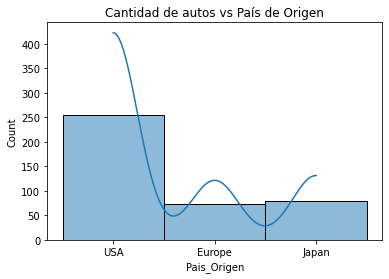

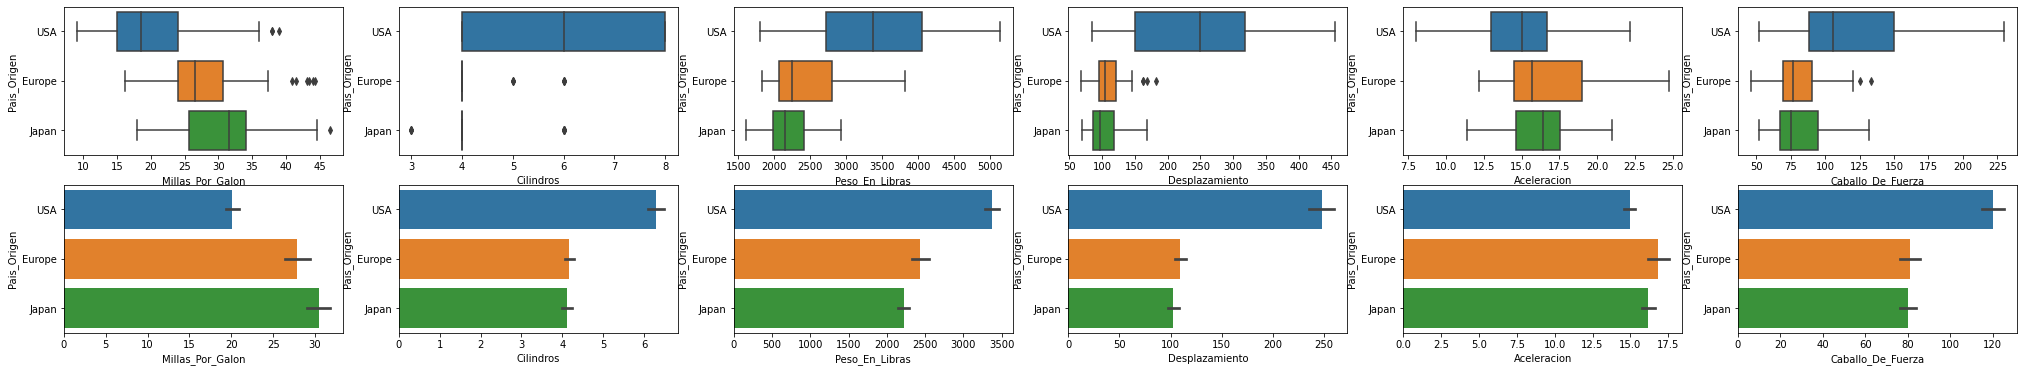

In [150]:
def graf_data(df:pd.DataFrame, category_col:str):
    columnas_int = df.select_dtypes(include=['float64', 'int']).columns
    g1=sns.histplot(data=df, x=category_col, kde=True)
    g1.set_title("Cantidad de autos vs País de Origen")
    _, axes = plt.subplots(nrows=2, ncols=len(columnas_int), figsize=(35, 6))
    for i,t in enumerate(columnas_int):
        g2=sns.boxplot(y =category_col, x = t, data=df, ax=axes[0,i])
        g3=sns.barplot(y =category_col, x = t, estimator = np.mean, data=df, ax=axes[1,i])

graf_data(df, 'Pais_Origen')



## Ejercicio 5

In [110]:
def graf_corr(df:pd.DataFrame, columna:pd.Series):
    """
    Esta función muestra los mapas de calor entre todas las variables cuantitativas respecto de una variable cualitativa

    Parámetros
    ----------

    df: Dataframe con los datos a calcular
    columna: Variable cualitativa a la cual se hará cada mapa de calor

    Se retorna los graficos "heatmap"

    Ejemplos
    --------
    df: df_autos
    columna: df['Pais_Origen']
    graf_corr(df:df_autos, columna = df['Pais_Origen'])
    >>> graficos
    
    
    """
    # Establecemos el area de dibujado
    _, axes = plt.subplots(nrows=1, ncols=len(columna.unique()), figsize=(35, 6)) # realizamos un bucle for en donde extraeremos las categorias de la variable cualitativa, en este caso son los países
    for i, country in enumerate(columna.unique()):
        columns_country = df[columna == country].select_dtypes(include=['float64', 'int']).columns # alamcenamos en identificador los nombres de las variables cuantitativas solamente
        correlacion = df[columns_country].corr() # calculamos su correlacion
        g = sns.heatmap(correlacion, # guardamos el grafico de las correlaciones en un mapa de calor
                    xticklabels = correlacion.columns.values,
                    yticklabels = correlacion.columns.values,
                    annot = True,
                    cmap = "viridis",
                    ax=axes[i]
                    )
        g.set_title(country) # Ponemos como titulo cada categoria

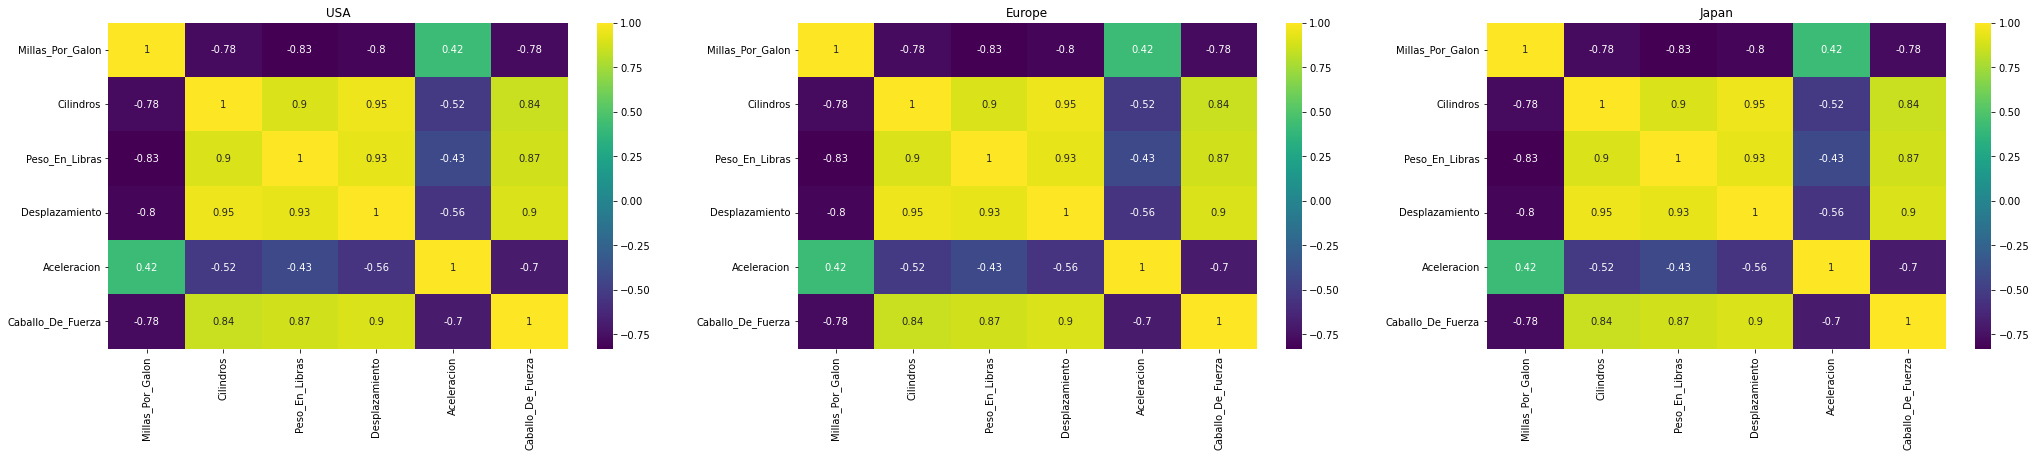

In [109]:
graf_corr(df, df['Pais_Origen'])